In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set(style="darkgrid")
%matplotlib inline

In [98]:
jobs_data = pd.read_csv('../Scraped_Data/Canada_jobs_city_5k2020-08-08.csv', encoding='UTF-8')

In [99]:
jobs_data.head(5)

,Expected_jobs,Actual_jobs,City,State
0,5,57,Alberton,Prince Edward Island
1,389,385,Charlottetown,Prince Edward Island
2,16,17,Cornwall,Prince Edward Island
3,1,1,Georgetown,Prince Edward Island
4,25,24,Kensington,Prince Edward Island


In [100]:
jobs_data.describe()

,Expected_jobs,Actual_jobs
count,1211.000000,1211.000000
mean,307.808423,85.014038
std,1130.769525,206.916957
min,0.000000,0.000000
25%,3.000000,0.000000
50%,27.000000,7.000000
75%,187.000000,53.000000
max,12858.000000,1375.000000


In [101]:
jobs_data.dtypes

Expected_jobs     int64
Actual_jobs       int64
City             object
State            object
dtype: object

In [102]:
jobs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 4 columns):
Expected_jobs    1211 non-null int64
Actual_jobs      1211 non-null int64
City             1211 non-null object
State            1211 non-null object
dtypes: int64(2), object(2)
memory usage: 38.0+ KB


## Analysing First digits of Expected Jobs vs Actual Jobs

In [103]:
jobs_data['Expected_jobs_first'] = jobs_data['Expected_jobs'].astype(str).str[0]
jobs_data['Actual_jobs_first'] = jobs_data['Actual_jobs'].astype(str).str[0]

In [104]:
jobs_data['Expected_jobs_first'].unique()

array(['5', '3', '1', '2', '8', '4', '0', '7', '9', '6'], dtype=object)

In [105]:
jobs_data['Actual_jobs_first'].unique()

array(['5', '3', '1', '2', '9', '6', '7', '4', '0', '8'], dtype=object)

In [106]:
jobs_data = jobs_data[(jobs_data != 0).all(1)]

In [107]:
# jobs_data['Expected_jobs_first'].unique()
jobs_data['Actual_jobs_first'].unique()

array(['5', '3', '1', '2', '9', '6', '7', '4', '8'], dtype=object)

In [108]:
jobs_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 875 entries, 0 to 1210
Data columns (total 6 columns):
Expected_jobs          875 non-null int64
Actual_jobs            875 non-null int64
City                   875 non-null object
State                  875 non-null object
Expected_jobs_first    875 non-null object
Actual_jobs_first      875 non-null object
dtypes: int64(2), object(4)
memory usage: 47.9+ KB


In [109]:
jobs_data.head(5)

,Expected_jobs,Actual_jobs,City,State,Expected_jobs_first,Actual_jobs_first
0,5,57,Alberton,Prince Edward Island,5,5
1,389,385,Charlottetown,Prince Edward Island,3,3
2,16,17,Cornwall,Prince Edward Island,1,1
3,1,1,Georgetown,Prince Edward Island,1,1
4,25,24,Kensington,Prince Edward Island,2,2


In [110]:
jobs_data.describe(include="all")

,Expected_jobs,Actual_jobs,City,State,Expected_jobs_first,Actual_jobs_first
count,875.000000,875.000000,875,875,875,875
unique,NaN,NaN,816,10,9,9
top,NaN,NaN,Neuville,Quebec,1,1
freq,NaN,NaN,4,427,249,281
mean,359.534857,117.611429,NaN,NaN,NaN,NaN
std,1294.132073,235.455510,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,NaN,NaN
25%,9.000000,5.000000,NaN,NaN,NaN,NaN
50%,41.000000,23.000000,NaN,NaN,NaN,NaN
75%,215.500000,93.000000,NaN,NaN,NaN,NaN


### Seprating first digit data

In [111]:
first_digit_data = jobs_data[['Expected_jobs_first','Actual_jobs_first']]

In [112]:
first_digit_data.head()

,Expected_jobs_first,Actual_jobs_first
0,5,5
1,3,3
2,1,1
3,1,1
4,2,2


In [113]:
Expected_first = first_digit_data.Expected_jobs_first.value_counts()
print(Expected_first[Expected_first>1])

1    249
2    156
3    118
4     82
5     76
7     63
6     50
8     49
9     32
Name: Expected_jobs_first, dtype: int64


In [114]:
Actual_first = first_digit_data.Actual_jobs_first.value_counts()
print(Expected_first[Actual_first>1])

1    249
2    156
3    118
4     82
5     76
7     63
6     50
8     49
9     32
Name: Expected_jobs_first, dtype: int64


### Expected Jobs

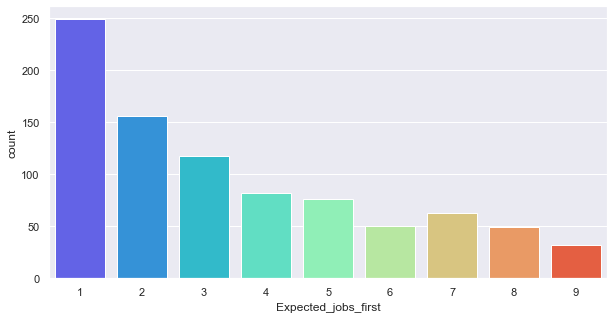

In [115]:
plt.rcParams['figure.figsize'] = [10, 5]
sns.countplot(x='Expected_jobs_first',data=first_digit_data,palette='rainbow')

[Text(0, 0.5, 'Percent')]

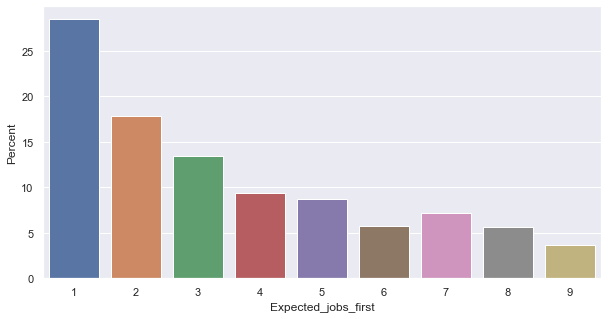

In [116]:
ax = sns.barplot(x="Expected_jobs_first", y="Expected_jobs_first", 
                 data=first_digit_data, 
                 estimator=lambda Expected_jobs_first: len(Expected_jobs_first) / len(first_digit_data) * 100)
ax.set(ylabel="Percent")

### Actual jobs

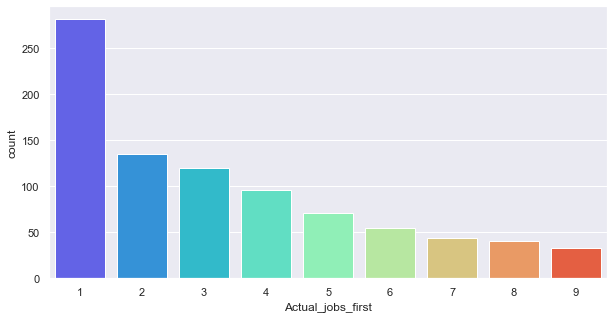

In [117]:
sns.countplot(x='Actual_jobs_first',data=first_digit_data,palette='rainbow')

[Text(0, 0.5, 'Percent')]

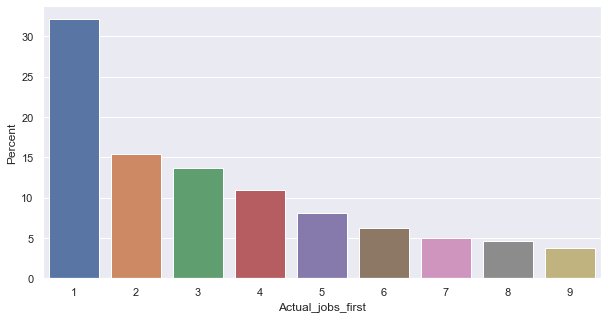

In [118]:
ax = sns.barplot(x="Actual_jobs_first", y="Actual_jobs_first", 
                 data=first_digit_data, 
                 estimator=lambda Actual_jobs_first: len(Actual_jobs_first) / len(first_digit_data) * 100)
ax.set(ylabel="Percent")

### Difference in Expected vs Actual jobs

In [87]:
jobs_data['diff'] = jobs_data['Expected_jobs'] - jobs_data['Actual_jobs']

In [88]:
jobs_data['diff_first'] = jobs_data['diff'].astype(str).str[0]

In [89]:
jobs_data.head()

,Expected_jobs,Actual_jobs,City,State,Expected_jobs_first,Actual_jobs_first,diff,diff_first
0,9,66,Alberton,Prince Edward Island,9,6,-57,-
1,404,400,Charlottetown,Prince Edward Island,4,4,4,4
2,397,6,Cornwall,Prince Edward Island,3,6,391,3
3,28,29,Georgetown,Prince Edward Island,2,2,-1,-
4,47,46,Kensington,Prince Edward Island,4,4,1,1


In [90]:
jobs_data.loc[jobs_data['diff'] < 0]

,Expected_jobs,Actual_jobs,City,State,Expected_jobs_first,Actual_jobs_first,diff,diff_first
0,9,66,Alberton,Prince Edward Island,9,6,-57,-
3,28,29,Georgetown,Prince Edward Island,2,2,-1,-
6,8,9,Souris,Prince Edward Island,8,9,-1,-
9,88,95,Amherst,Nova Scotia,8,9,-7,-
10,9,10,Annapolis Royal,Nova Scotia,9,1,-1,-
...,...,...,...,...,...,...,...,...
1116,6,7,Three Hills,Alberta,6,7,-1,-
1121,13,14,Valleyview,Alberta,1,1,-1,-
1133,53,55,Armstrong,British Columbia,5,5,-2,-
1158,10,28,Lake Cowichan,British Columbia,1,2,-18,-


In [91]:
# ax = sns.barplot(x="diff_first", y="diff_first", 
#                  data=jobs_data, 
#                  estimator=lambda diff_first: len(diff_first) / len(jobs_data) * 100)
# ax.set(ylabel="Percent")

### All jobs on one graph (Expected Sorted, desending)

In [92]:
jobs_data.head()

,Expected_jobs,Actual_jobs,City,State,Expected_jobs_first,Actual_jobs_first,diff,diff_first
0,9,66,Alberton,Prince Edward Island,9,6,-57,-
1,404,400,Charlottetown,Prince Edward Island,4,4,4,4
2,397,6,Cornwall,Prince Edward Island,3,6,391,3
3,28,29,Georgetown,Prince Edward Island,2,2,-1,-
4,47,46,Kensington,Prince Edward Island,4,4,1,1


In [93]:
plt.rcParams['figure.figsize'] = [10, 10]
new_1 = jobs_data[['Expected_jobs','Actual_jobs']] 
new_1 = new_1.sort_values(by=['Expected_jobs'], ascending=False).reset_index(drop=True)

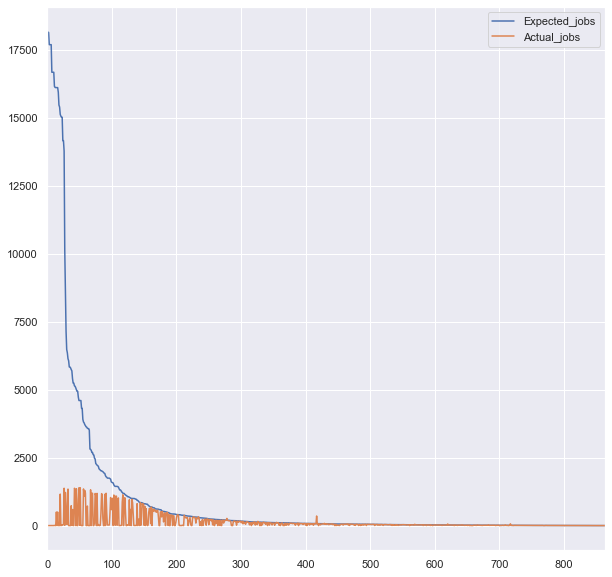

In [94]:
new_1.plot(kind='line')

(-50, 1500)

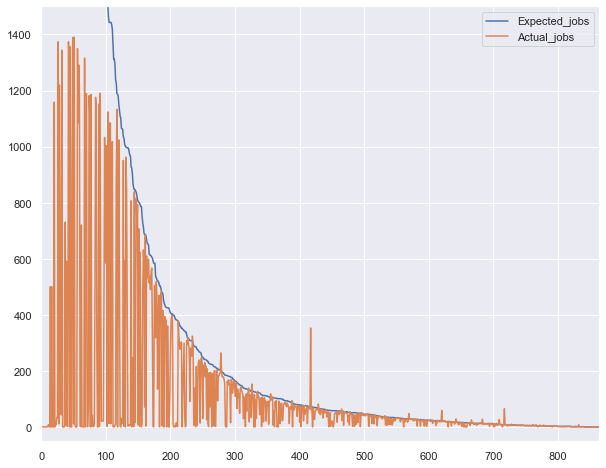

In [96]:
plt.rcParams['figure.figsize'] = [10, 8]
new_1.plot(kind='line', sort_columns=True)
plt.ylim(-50, 1500)

### All jobs on one graph (Actual Sorted, desending)

In [64]:
new_2 = jobs_data[['Expected_jobs','Actual_jobs']] 
new_2 = new_2.sort_values(by=['Actual_jobs'], ascending=False).reset_index(drop=True)

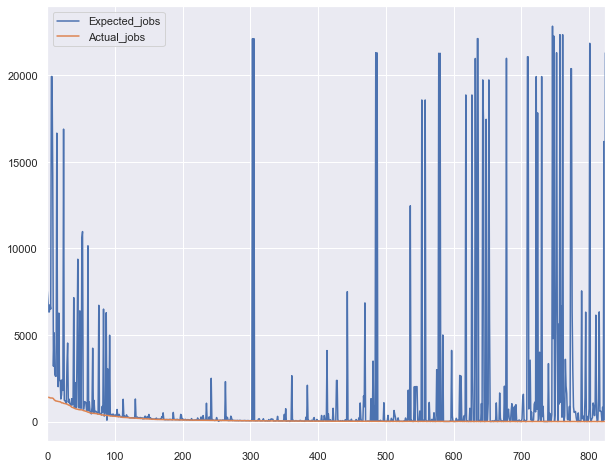

In [65]:
new_2.plot(kind='line')

(-50, 1100)

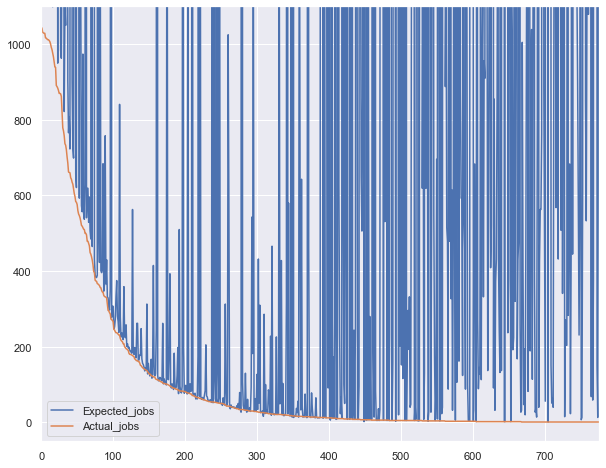

In [93]:
new_2.plot(kind='line', sort_columns=True)
plt.ylim(-50, 1100)